/Users/haydnmann/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Max YouTube Unique Reach is 5000000
Max Meta Unique Reach is 13400000


/Users/haydnmann/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/7_/qwdg9k5j0y72j2bdfhlvyk5h0000gn/T/ipykernel_9226/4203943385.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  MCPMs.drop(MCPMs.columns.difference(['CPM']), 1 , inplace = True)


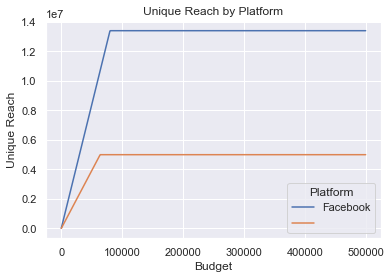

Enter a date formatted as DD/MM/YYYY: 01/01/2023
Enter a date formatted as DD/MM/YYYY: 31/03/2023
12
Enter the Weekly Frequency: 5
Enter the Campaign Budget: 500000
Your YouTube Budget of $250,000.00 sits within the reach curves of the platform and will generate a unique reach of 3,918,869
Your Facebook Budget of $250,000.00 sits within the reach curves of the platform and will generate a unique reach of 8,380,342


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load the Reach data
rdf1 = 'Platform Reach - Marvel (RAW).csv'
rdf = pd.read_csv(rdf1)

rdf = rdf.replace(',','', regex=True)
rdf['Unique Cookies with Impressions'] = rdf['Unique Cookies with Impressions'].astype(int)

index = 0
col = "Unique Cookies with Impressions"
ytTotalUUs = rdf.iloc[index][col]

index = 1
col = "Unique Cookies with Impressions"
FBTotalUUs = rdf.iloc[index][col]

mpdf1 = 'BAT Performance Data.csv'
mpdf = pd.read_csv(mpdf1)

mpdf2 = 'BAT Performance Data.csv'
mpdf = pd.read_csv(mpdf2)

mpdf.rename(columns = {'Platform ':'Platform'}, inplace = True)
cmpdf = mpdf.loc[mpdf['Platform'].isin(['YouTube','Facebook'])]

cmpdf.rename(columns = {'Campaign_Market [NC]':'Campaign_Market'}, inplace = True)
cmpdf = cmpdf.loc[cmpdf['Campaign_Market'].isin(['United Kingdom'])]

cmpdf['CPM'] = (cmpdf['Media Cost']/cmpdf['Impressions'])*1000

cmpdf['Unique Users'] = (cmpdf['Media Cost']/cmpdf['CPM'])*1000

rcdata = np.random.randint(1,500000,size=1000)
rcdf = pd.DataFrame(rcdata, columns=['Media_Spend'])

MeanCPMsDF = pd.DataFrame(columns = ['Mean Facebook CPM ($)', 'Mean YouTube CPM ($)'],
                          index = ['1'])

MCPMs = cmpdf.groupby(['Platform']).mean()
MCPMs.drop(MCPMs.columns.difference(['CPM']), 1 , inplace = True)

fbCPMmean = MCPMs["CPM"].loc['Facebook']
YTCPMmean = MCPMs["CPM"].loc['YouTube']

rcdf['Facebook Unique Reach'] = ((rcdf['Media_Spend']/fbCPMmean)*1000)
rcdf['YouTube Unique Reach'] = ((rcdf['Media_Spend']/YTCPMmean)*1000)

print('Max YouTube Unique Reach is',ytTotalUUs)
print('Max Meta Unique Reach is',FBTotalUUs)

rcdf.loc[rcdf['Facebook Unique Reach'] > FBTotalUUs, 'Facebook Unique Reach'] = FBTotalUUs
rcdf.loc[rcdf['YouTube Unique Reach'] > ytTotalUUs, 'YouTube Unique Reach'] = ytTotalUUs

import seaborn as sns
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
ax = sns.lineplot(x='Media_Spend', y='Facebook Unique Reach', data=rcdf)
ax = sns.lineplot(x='Media_Spend', y='YouTube Unique Reach', data=rcdf)
ax.set(xlabel='Budget', ylabel='Unique Reach', title='Unique Reach by Platform')
plt.legend(title='Platform', loc='lower right', labels=['Facebook', '', 'YouTube'])
plt.show()

from datetime import date

start_date = input('Enter a date formatted as DD/MM/YYYY: ')
end_date = input('Enter a date formatted as DD/MM/YYYY: ')

from datetime import datetime

start_date_clean = datetime.strptime(start_date,'%d/%m/%Y')
end_date_clean = datetime.strptime(end_date, '%d/%m/%Y')

days = abs(end_date_clean-start_date_clean).days

#caculating and printing the weeks, // = floor division operator
weeks_duration = (days//7)

print(weeks_duration)

weekly_frequency = input('Enter the Weekly Frequency: ')

weekly_frequency_int = int(weekly_frequency)
type(weekly_frequency_int)

Campaign_Budget = input('Enter the Campaign Budget: ')

Campaign_Budget_int = int(Campaign_Budget)
type(Campaign_Budget_int)

rcdf['YouTube Unique Reach'] = ((rcdf['Media_Spend']/YTCPMmean)*1000)

# create an Empty DataFrame object
UR_df = pd.DataFrame()
 
# append columns to an empty DataFrame
UR_df['Platform'] = ['Facebook', 'YouTube']
UR_df['Budget'] = [(Campaign_Budget_int/2),(Campaign_Budget_int/2)]
UR_df['Duration (weeks)'] = [weeks_duration,weeks_duration]
UR_df['Frequency_p/w'] = [weekly_frequency_int,weekly_frequency_int]
UR_df['Mean_CPM'] = [fbCPMmean,YTCPMmean]
UR_df['Max_Platform_Audience_Reach'] = [FBTotalUUs, ytTotalUUs]


Weekly_YouTube_Unique_Reach = (((((Campaign_Budget_int/2)/YTCPMmean)*1000)/weekly_frequency_int)/weeks_duration)

#adding a variable for reccomended budget
Reccomended_Maxmimum_YT_Budget = (((ytTotalUUs/1000)*YTCPMmean)*weeks_duration)

#Adding currency formatting to the reccomended budget & setting to 2 dp
YT_currency_string_Max_Budget = "${:,.2f}".format(Reccomended_Maxmimum_YT_Budget)

#Adding currency formatting for inputted budget
Inputted_YT_Budget = Campaign_Budget_int/2
YT_currency_string_Input_Budget = "${:,.2f}".format(Inputted_YT_Budget)

#creating an if statement that gives a reccomended budget if the unique reach for the budget exceeds the maximum reach
Weekly_YouTube_Unique_Reach =((((Inputted_YT_Budget/YTCPMmean)*1000)/weekly_frequency_int)/weeks_duration)

#The total reach of the inputted budget
Total_YT_Unique_Reach =((((Inputted_YT_Budget/YTCPMmean)*1000)/weekly_frequency_int))

#Changing the format to make it more readable
Total_YT_String_Unique_Reach = "{:,.0f}".format(Total_YT_Unique_Reach)


#creating if else statements that will reccomend a budget if it exceeds the total unique reach of the platform
if Weekly_YouTube_Unique_Reach > ytTotalUUs:
    Weekly_YouTube_Unique_Reach = ytTotalUUs and print('Your YouTube budget exceeds the maximum unique reach, we would reccomend that your YouTube budget does not exceed',YT_currency_string_Max_Budget,'per week for the audience selected.')

else: print('Your YouTube Budget of',YT_currency_string_Input_Budget,'sits within the reach curves of the platform and will generate a unique reach of',Total_YT_String_Unique_Reach)

    
#creating the same for Facebook

#adding a variable for reccomended budget
Reccomended_Maxmimum_FB_Budget = (((FBTotalUUs/1000)*fbCPMmean)*weeks_duration)

#Adding currency formatting to the reccomended budget & setting to 2 dp
FB_currency_string_Max_Budget = "${:,.2f}".format(Reccomended_Maxmimum_FB_Budget)

#Adding currency formatting for inputted budget
Inputted_FB_Budget = Campaign_Budget_int/2
FB_currency_string_Input_Budget = "${:,.2f}".format(Inputted_FB_Budget)

#creating an if statement that gives a reccomended budget if the unique reach for the budget exceeds the maximum reach
Weekly_Facebook_Unique_Reach = ((((Inputted_FB_Budget/fbCPMmean)*1000)/weekly_frequency_int)/weeks_duration)

#The total reach of the inputted budget
Total_Facebook_Unique_Reach = ((((Inputted_FB_Budget/fbCPMmean)*1000)/weekly_frequency_int))

#Changing the format to make it more readable
FB_UniqueReach_string_Unique_Reach = "{:,.0f}".format(Total_Facebook_Unique_Reach)

#creating if else statements that will reccomend a budget if it exceeds the total unique reach of the platform
if Weekly_Facebook_Unique_Reach > FBTotalUUs:
    Weekly_Facebook_Unique_Reach = FBTotalUUs and print('Your Facebook budget exceeds the maximum unique reach, we would reccomend that your YouTube budget does not exceed',FB_currency_string_Max_Budget,'per week for the audience selected.')

else: print('Your Facebook Budget of',FB_currency_string_Input_Budget,'sits within the reach curves of the platform and will generate a unique reach of',FB_UniqueReach_string_Unique_Reach)

    

